Setup

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [29]:
#1
player_stats_df = pd.read_csv("player_stats.csv")
team_stats_df = pd.read_csv("team_stats.csv")

ast = player_stats_df["ast"]
tov = player_stats_df["tov"]

net_rtg = team_stats_df["net_rtg"]
wins = team_stats_df["W"]



In [30]:
#2 A & B
player_stats_ols = smf.ols("tov ~ 1 + ast", data = player_stats_df)
player_stats_fit = player_stats_ols.fit()
player_stats_fit.summary()

team_stats_ols = smf.ols("net_rtg ~ 1 + W", data = team_stats_df)
team_stats_fit = team_stats_ols.fit()
team_stats_fit.summary()

player_fit_intercept = player_stats_fit.params["Intercept"]
player_fit_slope =  player_stats_fit.params["ast"]

team_fit_intercept = team_stats_fit.params["Intercept"]
team_fit_slope = team_stats_fit.params["W"]




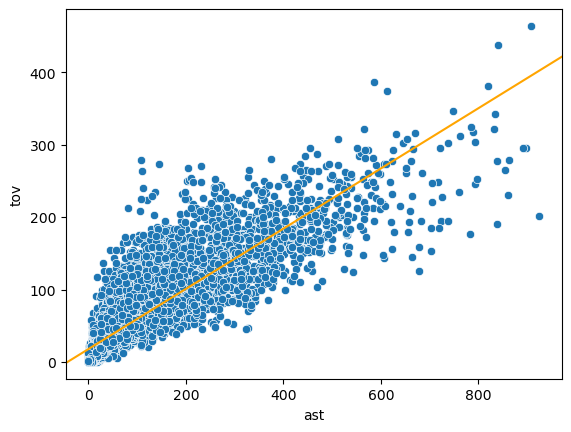

In [31]:
#2 C
sns.scatterplot(data = player_stats_df, x = "ast", y = "tov")
plt.axline([0,player_fit_intercept ], slope =player_fit_slope, color = "orange" )

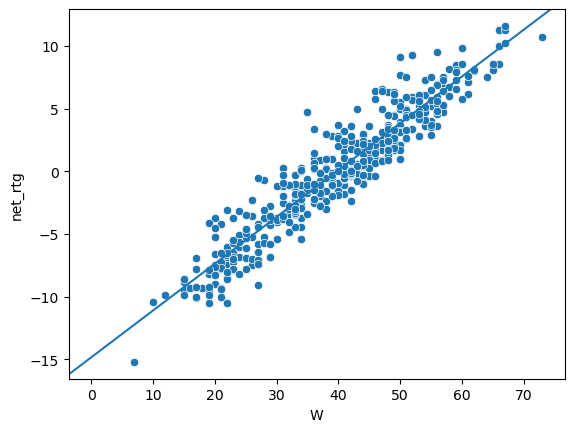

In [32]:
#2 C
sns.scatterplot(data = team_stats_df, x = wins, y = net_rtg)
plt.axline([0, team_fit_intercept], slope = team_fit_slope)

In [33]:
#2 D
PSP = player_fit_intercept + (player_fit_slope * player_stats_df["ast"])
TSP = team_fit_intercept + (team_fit_slope * wins)


<AxesSubplot:xlabel='ast', ylabel='tov'>

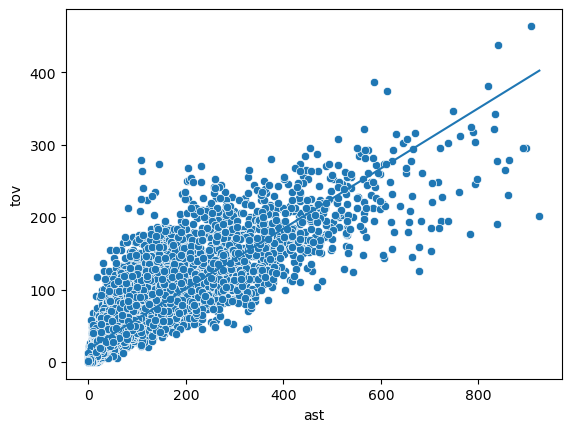

In [34]:
#2E
sns.scatterplot(data = player_stats_df, x = "ast", y = "tov")
sns.lineplot(data = player_stats_df, x = "ast", y = PSP)

<AxesSubplot:xlabel='W', ylabel='net_rtg'>

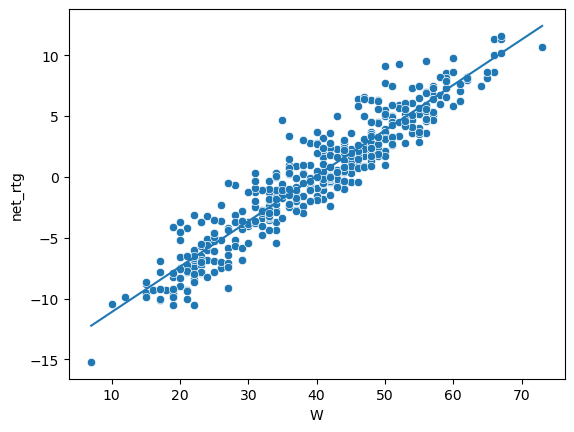

In [35]:
#2E
sns.scatterplot(data = team_stats_df, x = "W", y = "net_rtg")
sns.lineplot(data = team_stats_df, x = "W", y = TSP)

In [36]:
#3A

mse_fit1 = ((net_rtg - TSP)**2).mean()
print(mse_fit1)

2.539410436223527


11.539410436223529


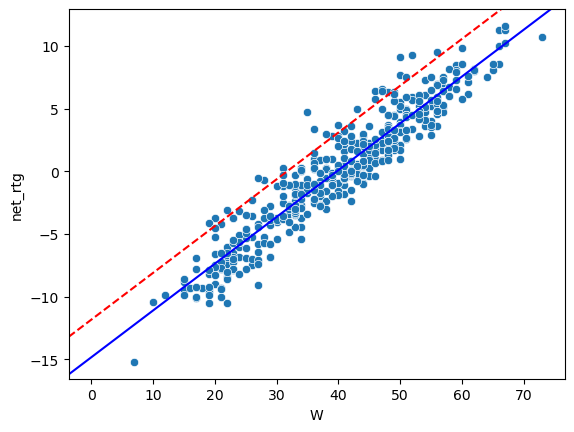

In [37]:
#3B, 3F, 3G

adjustment_to_intercept = 3 # change this value up or down from zero to see the impact on MSE
adjustment_to_slope = 0 # change this value up or down from zero to see the impact on MSE

adjusted_intercept = team_fit_intercept + adjustment_to_intercept
adjusted_slope = team_fit_slope + adjustment_to_slope

predictions = adjusted_intercept + (adjusted_slope * team_stats_df["W"]) # predictions from linear equation
MSE_after_adjustments = ((team_stats_df["net_rtg"] - predictions)**2).mean()
print(MSE_after_adjustments)
sns.scatterplot(data= team_stats_df, x= wins, y= net_rtg)
plt.axline([0, team_fit_intercept], slope = team_fit_slope, color = "blue") # original regression line
plt.axline([0, adjusted_intercept], slope= adjusted_slope, linestyle="dashed", color = "red")# regression line based on the "adjusted" values above

11.53941043622352


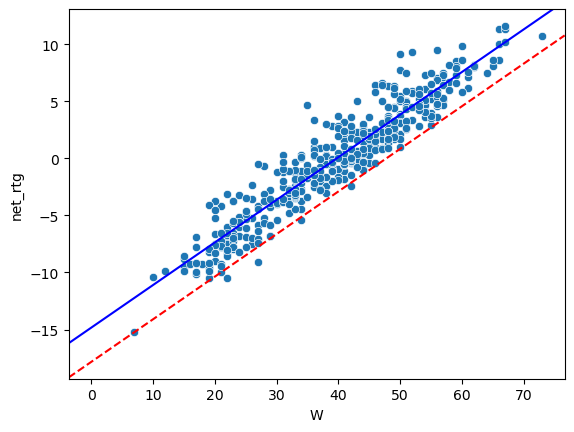

In [38]:
#3C , 3F, 3G

adjustment_to_intercept = -3 # change this value up or down from zero to see the impact on MSE
adjustment_to_slope = 0 # change this value up or down from zero to see the impact on MSE

adjusted_intercept = team_fit_intercept + adjustment_to_intercept
adjusted_slope = team_fit_slope + adjustment_to_slope

predictions = adjusted_intercept + (adjusted_slope * team_stats_df["W"]) # predictions from linear equation
MSE_after_adjustments = ((team_stats_df["net_rtg"] - predictions)**2).mean()
print(MSE_after_adjustments)
sns.scatterplot(data= team_stats_df, x= wins, y= net_rtg)
plt.axline([0, team_fit_intercept], slope = team_fit_slope, color = "blue") # original regression line
plt.axline([0, adjusted_intercept], slope= adjusted_slope, linestyle="dashed", color = "red")# regression line based on the "adjusted" values above

72.05372154733465


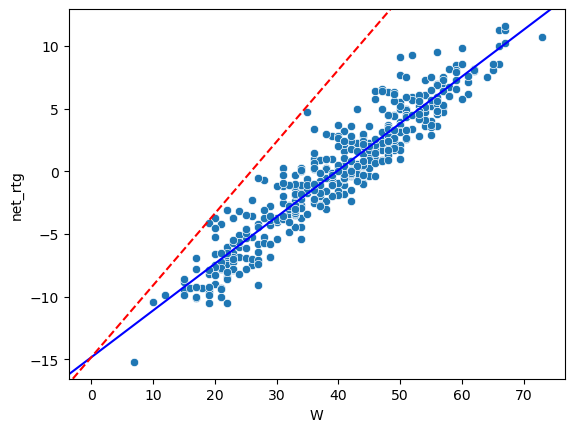

In [48]:
#3D, 3F, 3G

adjustment_to_intercept = 0 # change this value up or down from zero to see the impact on MSE
adjustment_to_slope = .2 # change this value up or down from zero to see the impact on MSE

adjusted_intercept = team_fit_intercept + adjustment_to_intercept
adjusted_slope = team_fit_slope + adjustment_to_slope

predictions = adjusted_intercept + (adjusted_slope * team_stats_df["W"]) # predictions from linear equation
MSE_after_adjustments = ((team_stats_df["net_rtg"] - predictions)**2).mean()
print(MSE_after_adjustments)
sns.scatterplot(data= team_stats_df, x= wins, y= net_rtg)
plt.axline([0, team_fit_intercept], slope = team_fit_slope, color = "blue") # original regression line
plt.axline([0, adjusted_intercept], slope= adjusted_slope, linestyle="dashed", color = "red")# regression line based on the "adjusted" values above

72.05372154733467


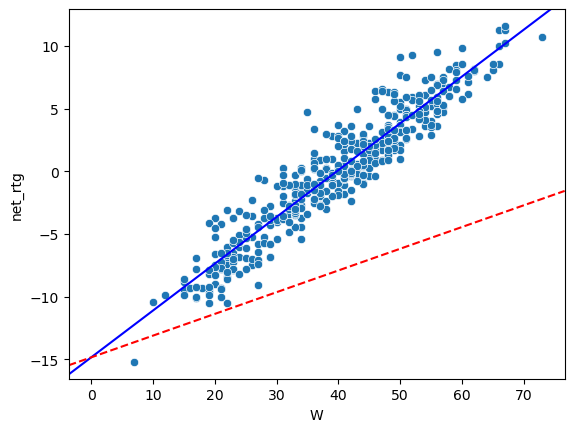

In [49]:
#3D2 3F. 3G

adjustment_to_intercept = 0 # change this value up or down from zero to see the impact on MSE
adjustment_to_slope = -.2 # change this value up or down from zero to see the impact on MSE

adjusted_intercept = team_fit_intercept + adjustment_to_intercept
adjusted_slope = team_fit_slope + adjustment_to_slope

predictions = adjusted_intercept + (adjusted_slope * team_stats_df["W"]) # predictions from linear equation
MSE_after_adjustments = ((team_stats_df["net_rtg"] - predictions)**2).mean()
print(MSE_after_adjustments)
sns.scatterplot(data= team_stats_df, x= wins, y= net_rtg)
plt.axline([0, team_fit_intercept], slope = team_fit_slope, color = "blue") # original regression line
plt.axline([0, adjusted_intercept], slope= adjusted_slope, linestyle="dashed", color = "red")# regression line based on the "adjusted" values above

39.8184326584457


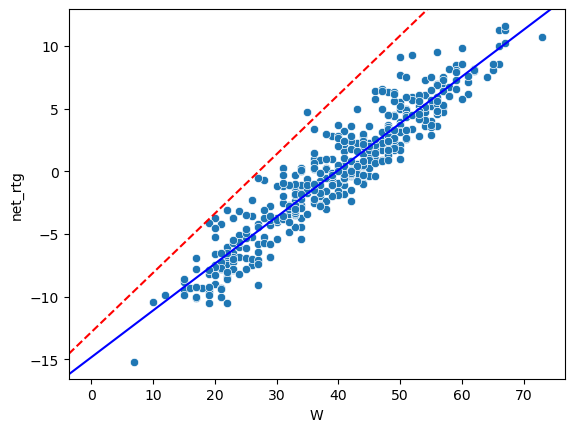

In [50]:
#3E 3F 3G

adjustment_to_intercept = 2 # change this value up or down from zero to see the impact on MSE
adjustment_to_slope = .1 # change this value up or down from zero to see the impact on MSE

adjusted_intercept = team_fit_intercept + adjustment_to_intercept
adjusted_slope = team_fit_slope + adjustment_to_slope

predictions = adjusted_intercept + (adjusted_slope * team_stats_df["W"]) # predictions from linear equation
MSE_after_adjustments = ((team_stats_df["net_rtg"] - predictions)**2).mean()
print(MSE_after_adjustments)
sns.scatterplot(data= team_stats_df, x= wins, y= net_rtg)
plt.axline([0, team_fit_intercept], slope = team_fit_slope, color = "blue") # original regression line
plt.axline([0, adjusted_intercept], slope= adjusted_slope, linestyle="dashed", color = "red")# regression line based on the "adjusted" values above

In [42]:
#3G

#New MSE :
11.539410436223529
11.53941043622352
15643.25941043622
15643.259410436225
15170.246077102882

#Orginal : 

2.539410436223527


2.539410436223527

Used Cars Data Set

Provided By Daniel Gwira



<AxesSubplot:xlabel='Selling_Price', ylabel='Present_Price'>

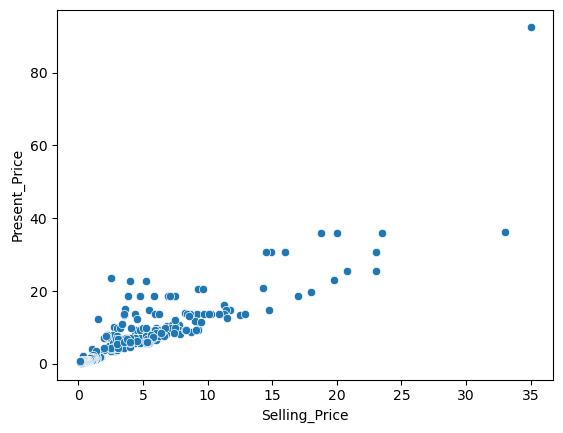

In [43]:
#4A
cars_df = pd.read_csv("cars.csv")
inital_price = cars_df["Selling_Price"]
present_price = cars_df["Present_Price"]
sns.scatterplot( x = inital_price, y = present_price)

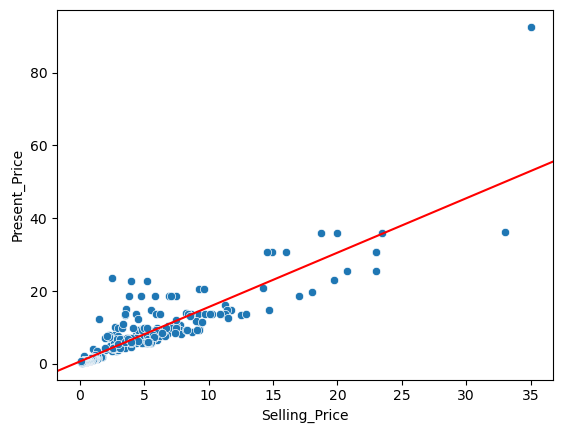

In [44]:
#4B
cars_ols = smf.ols("Present_Price ~ 1 + Selling_Price", data = cars_df)
cars_fit = cars_ols.fit()
cars_fit_intercept = cars_fit.params["Intercept"]
cars_fit_slope = cars_fit.params["Selling_Price"]
sns.scatterplot(data = cars_df, x = inital_price, y = present_price)
plt.axline([0, cars_fit_intercept], slope = cars_fit_slope, color = "red")

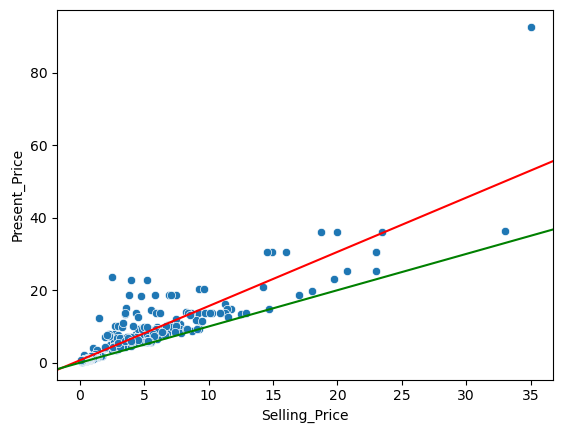

In [45]:
#4C
sns.scatterplot(data = cars_df, x = inital_price, y = present_price)
plt.axline([0, cars_fit_intercept], slope = cars_fit_slope, color = "red")
plt.axline([0,0], slope = 1, color = "Green")# 1 to 1 

4D. I would say yes. It somehwat shows a patter consistent to regressing towards the average

4E. Since cars typically depreciate over time they might conclude that a cars price will drop based on its inital price in most cases.